In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
# https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

In [114]:
PATH ='input/'
!pwd

/Users/DS/kaggle/titanic


In [249]:

train = pd.read_csv(PATH+'train.csv')
test = pd.read_csv(PATH+'test.csv')
combine = pd.concat([train.assign(DS='train') ,test.assign(DS='test',Survived='NA')],axis=0)


In [250]:
#null values
print(combine.isna().sum(axis=0))
#remove Cabin column from train,test, Combine
# train = train.drop(['Cabin'],axis=1)
# test = test.drop(['Cabin'],axis=1)
# combine = combine.drop(['Cabin'],axis=1)

Age             263
Cabin          1014
DS                0
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64


In [252]:
#outliers
#seperate categorical/bin/continous/ID  variables
ID =['PassengerId','Name','DS','Ticket']
Target ='Survived'
Catcol =['Age','Embarked','Pclass','Parch','Sex','SibSp']
contcol =[]
cols = [x for x in combine.columns if x not in (ID+Catcol+['Survived'])]
cols
for col in cols:
    print(col)
    print(combine[col].value_counts())



Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
F2                 4
D                  4
C22 C26            4
C78                4
B96 B98            4
E101               3
A34                3
B58 B60            3
E34                3
B51 B53 B55        3
C101               3
B20                2
C6                 2
C125               2
F G63              2
E8                 2
B45                2
C55 C57            2
C124               2
C32                2
C31                2
D28                2
C92                2
E25                2
B18                2
                  ..
F                  1
T                  1
C30                1
C39                1
A6                 1
C105               1
B24                1
B30                1
C104               1
E49                1
B11                1
B80                1
A5                 1
C95                1
E17                1
E58                1
D22    

,Age,Cabin,DS,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeAbove12,NoPerTicket
0,22.0,NaN,train,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,1
40,40.0,NaN,train,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,0,7546,2,1
68,17.0,NaN,train,S,7.9250,"Andersson, Miss. Erna Alexandra",2,69,3,female,4,1,3101281,2,1
69,26.0,NaN,train,S,8.6625,"Kink, Mr. Vincenz",0,70,3,male,2,0,315151,2,1
104,37.0,NaN,train,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,0,3101276,2,1
113,20.0,NaN,train,S,9.8250,"Jussila, Miss. Katriina",0,114,3,female,1,0,4136,2,1
136,19.0,D47,train,S,26.2833,"Newsom, Miss. Helen Monypeny",2,137,1,female,0,1,11752,2,1
175,18.0,NaN,train,S,7.8542,"Klasen, Mr. Klas Albin",1,176,3,male,1,0,350404,2,1
192,19.0,NaN,train,S,7.8542,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,193,3,female,1,1,350046,2,1
197,42.0,NaN,train,S,8.4042,"Olsen, Mr. Karl Siegwart Andreas",1,198,3,male,0,0,4579,2,1


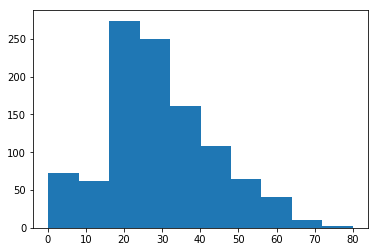

In [253]:

agebins = plt.hist(combine['Age'][combine['Age'].isnull()==False],bins=10)
combine['AgeAbove12'] = np.NAN
combine['AgeAbove12'] =[ 2 if x>12 else 1 for x in combine['Age']]

combine['NoPerTicket']  = combine['Ticket'].value_counts()[combine['Ticket']].values
t = combine[(combine['Parch']==0) & (combine['Age'].isnull()==True) & (combine['SibSp']==0) & (combine['NoPerTicket']==1)]['PassengerId']
for i in combine['PassengerId']:
    if i in t:
        combine.loc[i,'AgeAbove12'] =2

#single ticket but siblings or parch are there
combine[(combine['NoPerTicket']==1) & (combine['Age'].isnull()==False) & ((combine['Parch']>0) | (combine['SibSp']>0)) ]

# combine[(combine['NoPerTicket']==1) & (combine['Parch']==0) & (combine['Age'].isnull()==True) & (combine['SibSp']==0) ]

# combine['Agebin'] = 0
# combine[combine['Fare']<10]
# combine[(combine['Age'].isnull()==False) & (combine['Parch']==0)]
# combine[(combine['Age']<15) & (combine['Parch']==0)]
# combine['Parch'].value_counts()
# combine[combine['Ticket']=='CA. 2343']
# combine[combine['Ticket']=='364516']
# combine[(combine['Parch']==0) & (combine['SibSp']==0)].sort_values(['Ticket','Age'])
# parch=0 and single ticket means an adult

# combine[(combine['Parch']==0) & (combine['Age'].isnull()==True) &  (combine['NoPerTicket']==1)].sort_values(['Ticket','Age'])

# [x for x in combine[(combine['Parch']==0) & (combine['Age'].isnull()==True) &  (combine['NoPerTicket']==1)]['PassengerId']]
# combine[(combine['Age'].isnull()) & (combine['Parch']==0) & (combine['SibSp']==0) & (combine['NoPerTicket']==1)]
# combine[(combine['Age'] > 11) & (combine['AgeAbove12']==0)]




In [254]:
combine['AgeAbove12'].value_counts()

2    1140
1     169
Name: AgeAbove12, dtype: int64

In [255]:
listl =[]
for i in combine['Name']:
    if str(i).find('Larsson')>=0:
        listl.append(i)
listl

['Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Larsson, Mr. Bengt Edvin',
 'Larsson, Mr. August Viktor',
 'Larsson-Rondberg, Mr. Edvard A']

In [256]:
combine[(combine['NoPerTicket'] ==1)][['Fare','Pclass','Sex']].groupby(['Pclass','Sex']).describe()

Fare                                                           \
               count       mean       std      min      25%      50%      75%   
Pclass Sex                                                                      
1      female   19.0  30.657889  7.380034  25.7000  26.5500  27.7208  30.8396   
       male     87.0  28.776482  9.928072   0.0000  26.5500  27.7208  30.6958   
2      female   35.0  12.538809  1.284789  10.5000  12.1750  13.0000  13.0000   
       male    101.0  12.050658  2.547718   0.0000  10.5000  13.0000  13.0000   
3      female  105.0   7.958814  0.650232   6.7500   7.7500   7.7750   7.9250   
       male    365.0   7.870146  1.117737   3.1708   7.5208   7.8542   8.0500   

                        
                   max  
Pclass Sex              
1      female  49.5042  
       male    50.4958  
2      female  16.0000  
       male    16.0000  
3      female  10.5167  
       male    19.9667

In [257]:
# title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
#                     'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
#                     'Don', 'Jonkheer']
# import string
# def substrings_in_string(big_string, substrings):
#     for substring in substrings:
#         if string.find(big_string, substring) != -1:
#             return substring
#     print (big_string)
#     return np.nan

# combine['Title']=combine['Name'].map(lambda x: substrings_in_string(x, title_list))
# Names= [str(x).split(",")[1] for x in combine.Name]
# Names =[str(x).split()[0] for x in Names]
# Names = [x[:-1] if x[-1]=="." else np.NaN for x in Names ]
# combine['Title'] = Names

combine['Title'] = combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
combine['Title'] = combine['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
combine['Title'] = combine['Title'].replace('Mlle', 'Miss')
combine['Title'] = combine['Title'].replace('Ms', 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')
print(combine['Title'].value_counts(dropna=False))
print(pd.crosstab(combine['Title'],combine['Sex']))

Mr          757
Miss        264
Mrs         198
Master       61
Rev           8
Dr            8
Col           4
Royal         3
Major         2
Dona          1
Capt          1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Sex       female  male
Title                 
Capt           0     1
Col            0     4
Don            0     1
Dona           1     0
Dr             1     7
Jonkheer       0     1
Major          0     2
Master         0    61
Miss         264     0
Mr             0   757
Mrs          198     0
Rev            0     8
Royal          2     1


In [258]:
#To check whether any male with title as Mr is having less than 10 yrs age and travelling alone without siblings or parch or col traveller( same ticket)
combine[ (combine['NoPerTicket']==1) &  (combine['Age'] <13) & (combine['Sex']=='male') &(combine['Title']=='Mr')].sort_values('Age')


,Age,Cabin,DS,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeAbove12,NoPerTicket,Title


In [259]:
#consider traveller with title Mr and travelling alone as aboveag 12.
t = combine[(combine['NoPerTicket']==1) & 
            (combine['Age'].isnull()) & 
            (combine['SibSp']==0) & 
            (combine['Parch']==0) &  
            (combine['Sex']=='male') &
            (combine['Title']=='Mr') & (combine['AgeAbove12']==0) ]['PassengerId']
for i in combine['PassengerId']:
    if i in t:
        combine.loc[i,'AgeAbove12'] =1

t

Series([], Name: PassengerId, dtype: int64)

In [260]:
#skewness of each variable
#each variable distribution
#pairwise comparison
#each variable distributio with target variable
#categorical values to cat codes
#new columns like title from name
#new columnbs based on age bins

# def agebins(x):
#     if x < 1:
#         return 'Below1'
#     elif x <5:
#         return 'Below5'
#     elif x < 10:
#         return 'Below10'
#     elif x < 14:
#         return 'Below14'
#     elif x < 20:
#         return 'Below20'
#     elif x >19:
#         return 'Above20'
        
# combine['AgeBins']=combine['Age'].map(lambda x: agebins(x))

#sort the ages into logical categories
combine["Age"] = combine["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
combine['AgeGroup'] = pd.cut(combine["Age"], bins, labels = labels)


In [261]:
combine['Family'] = combine['Parch'] + combine['SibSp']

In [262]:
combine.columns

Index(['Age', 'Cabin', 'DS', 'Embarked', 'Fare', 'Name', 'Parch',
       'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket',
       'AgeAbove12', 'NoPerTicket', 'Title', 'AgeGroup', 'Family'],
      dtype='object')

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


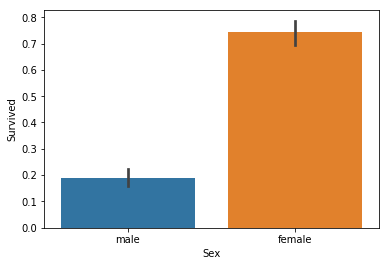

In [263]:
#draw a bar plot of survival by sex
sn.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [273]:
combine['Cabin']
combine['CabinPretext'] = combine.Cabin.str.extract('([A-Za-z]+)', expand=False)


In [315]:
# combine[combine['Cabin'].isnull()==False][['Cabin','CabinPretext','Pclass','Fare','NoPerTicket']]
f = {'Survived':['sum'], 'PassengerId':['count']}
combine[(combine['Cabin'].isnull()==False) & (combine['DS']=='train')][['CabinPretext','Pclass','PassengerId','Survived']].groupby(['Pclass','CabinPretext','Survived']).count()
# combine[['Pclass','PassengerId']].groupby(['Pclass']).count()



PassengerId
Pclass CabinPretext Survived             
1      A            0                   8
                    1                   7
       B            0                  12
                    1                  35
       C            0                  24
                    1                  35
       D            0                   7
                    1                  22
       E            0                   7
                    1                  18
       T            0                   1
2      D            0                   1
                    1                   3
       E            0                   1
                    1                   3
       F            0                   1
                    1                   7
3      E            1                   3
       F            0                   4
                    1                   1
       G            0                   2
                    1                   2

In [180]:
combine = combine.drop(['Cabin'],axis=1) # cabin has 70% are nulls 

In [181]:
ID =['PassengerId','Name','Parch','SibSp']
combine.drop(ID,inplace=True,axis=1) # remove ID columns
# Target ='Survived'
# combine.drop(Target,inplace=True) # remove Target columns

In [182]:
combine
Target ='Survived'
Catcol =['Embarked','Ticket','Pclass','Sex','Family','AgeAbove12','NoPerTicket','Title','AgeGroup']



In [183]:
train_tmp = combine[combine['DS']=='train']
train_tmp.drop('DS',axis=1,inplace=True)

/Users/DS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
#changing categorical column values into numerical
import matplotlib.pyplot as plt
for col in train_tmp.columns:
    train_tmp[col] = train_tmp[col].astype('category').cat.codes
    

/Users/DS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


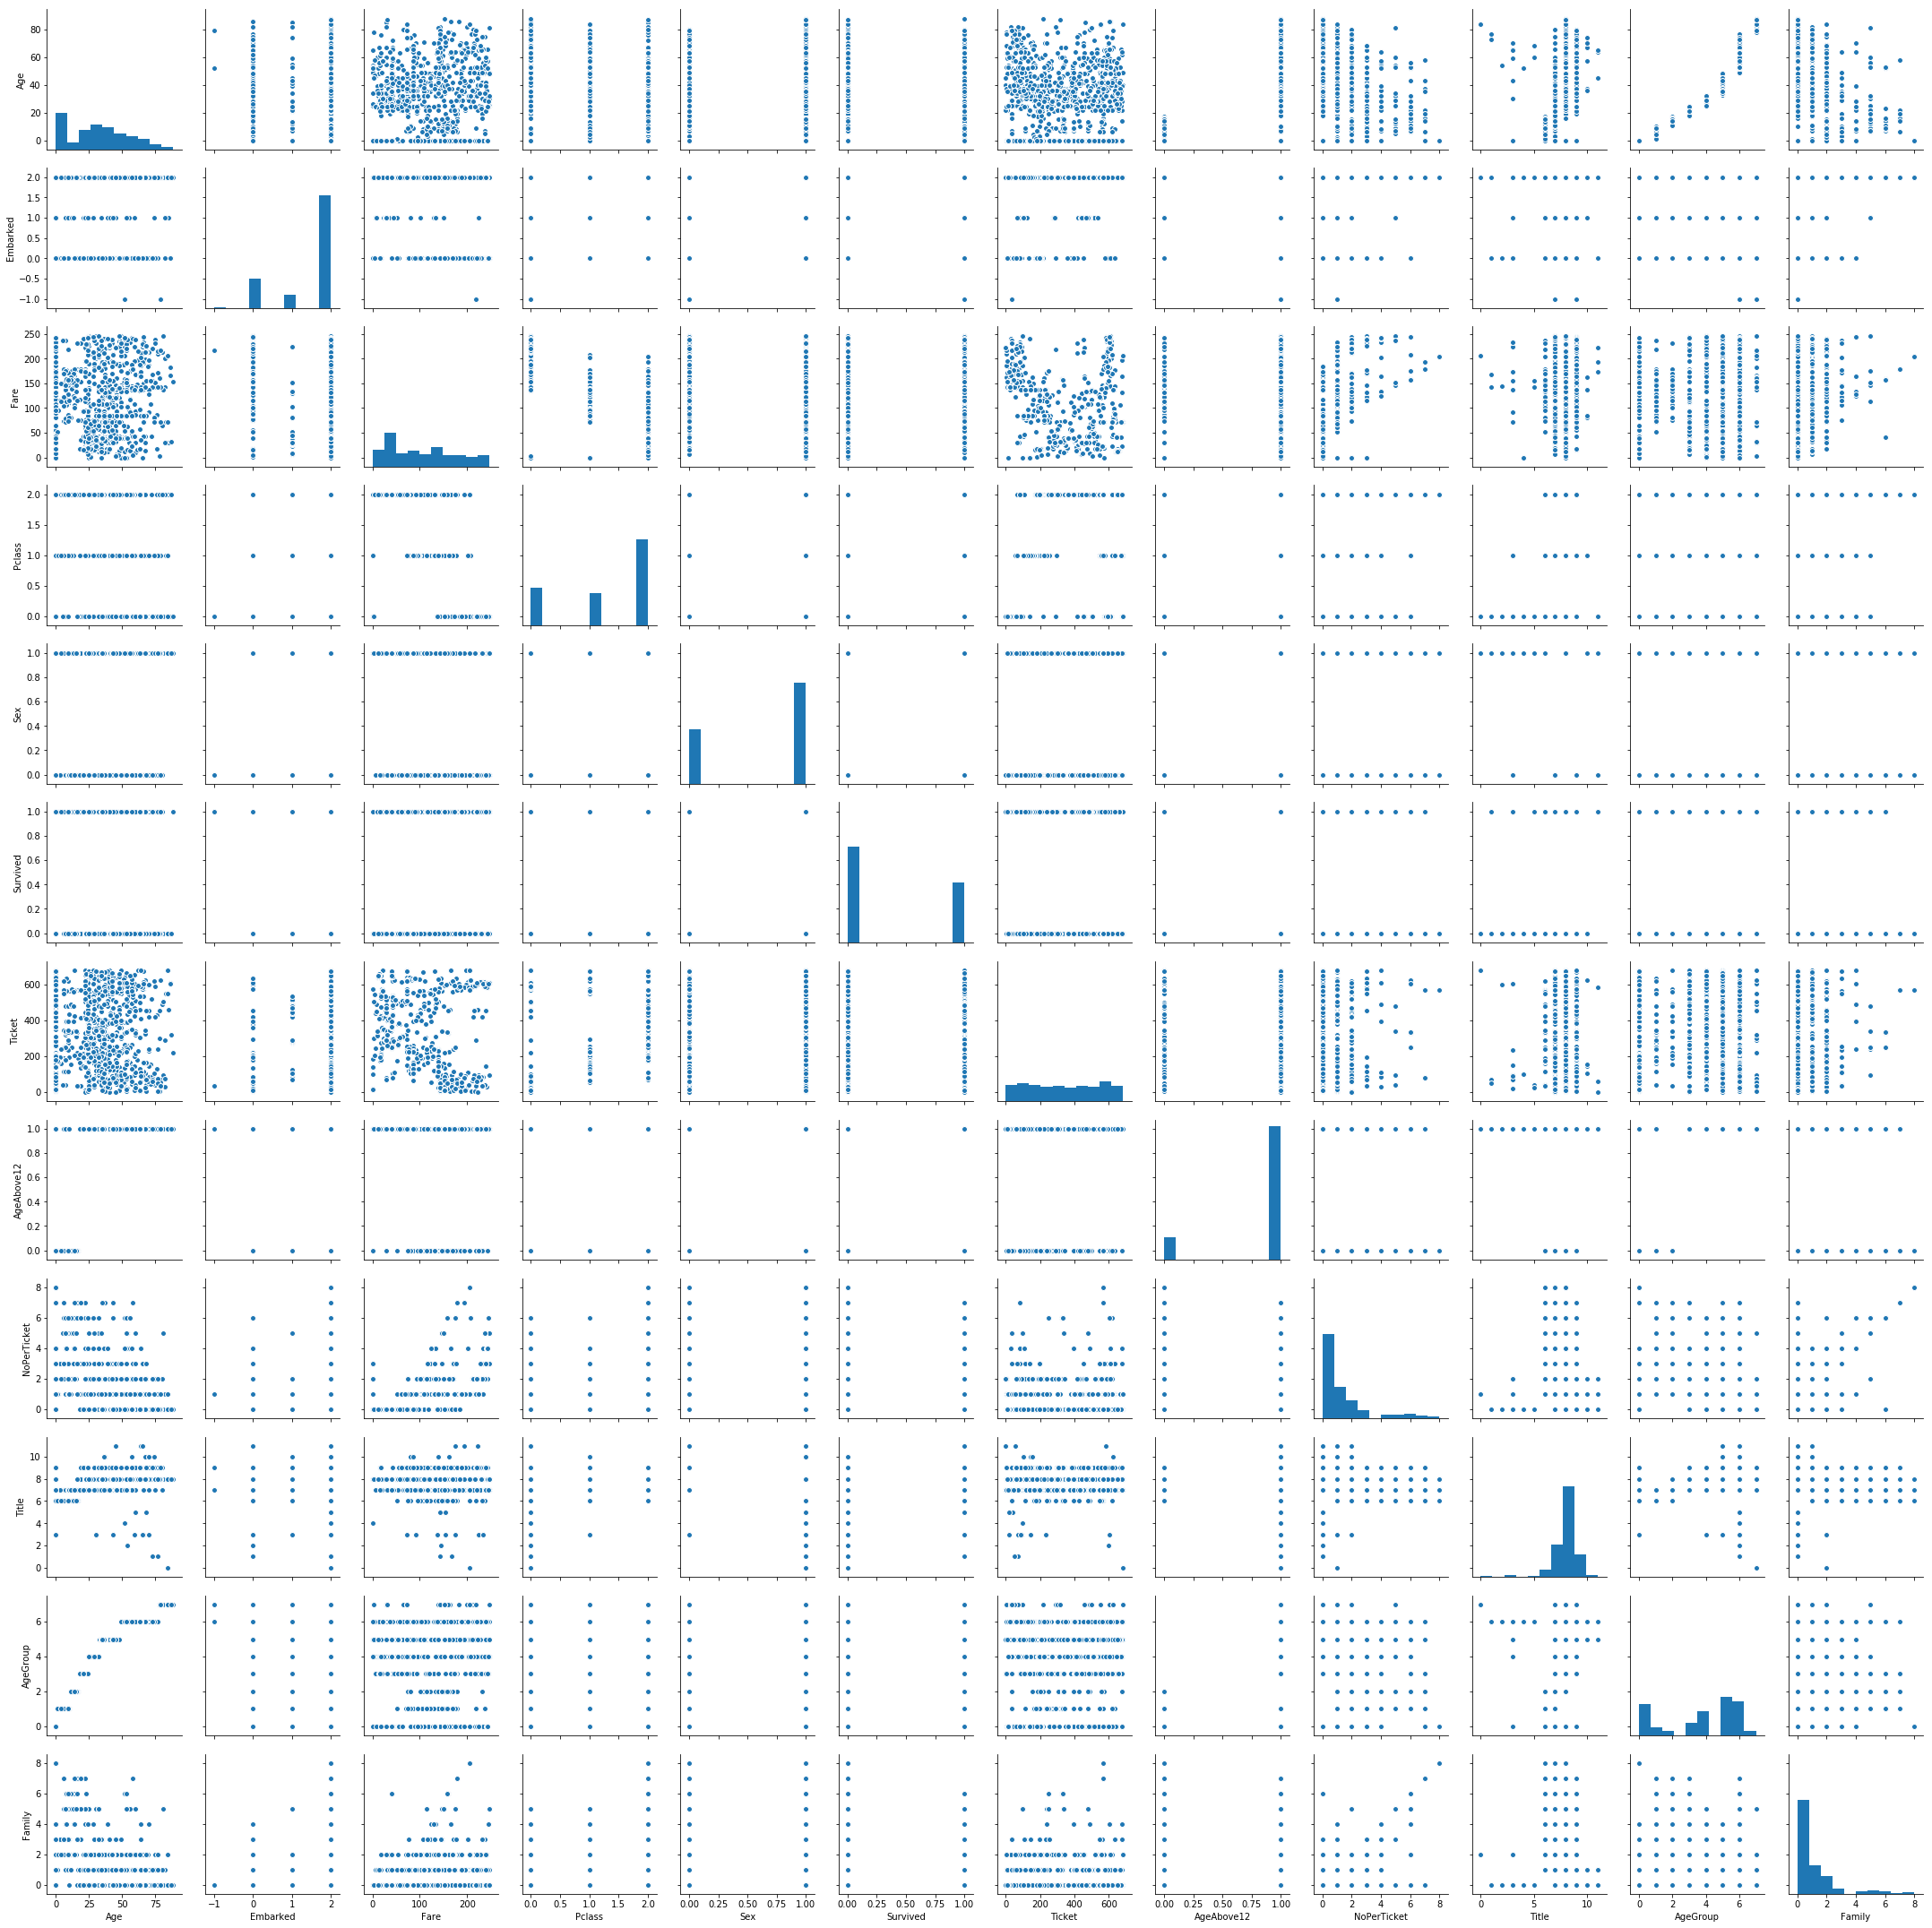

In [185]:
sn.pairplot(train_tmp)


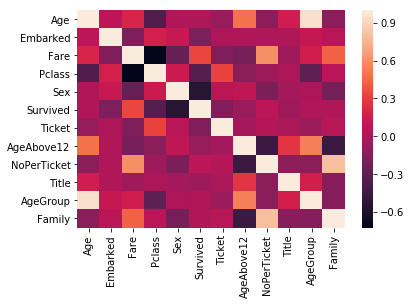

In [186]:

sn.heatmap(train_tmp.corr())

In [187]:
# f = {'A':['sum','mean'], 'B':['prod']}
f = {'Survived':['sum'], 'PassengerId':['count']}
#[train['Ticket'] == '110413']
t = train[['Ticket','Survived','PassengerId']].groupby('Ticket').agg(f)

# [1][0]
# df.groupby('GRP').agg(f)
# g.filter(lambda x: len(x) > 1) 
#  g.filter(lambda x: x['B'].sum() == 5)
# .sort_values('Ticket')
# 
# sum(t['Survived'] - t['PassengerId'])
# 110413

In [188]:
for col in Catcol:
    print(combine[col].unique())
    print(col)
# combine[Catcol]

['S' 'C' 'Q' nan]
Embarked
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '

In [189]:
Catcol =['Embarked','Ticket','Pclass','Sex','Family','AgeAbove12','NoPerTicket','Title','AgeGroup']

In [190]:
combine['Embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [191]:
combine.reset_index(drop=True,inplace=True)
combine.drop(index=combine[combine['Embarked'].isnull()].index,inplace=True)
# combine.reset_index(drop=True,inplace=True)
# combine.drop(index=combine[combine['Fare'].isnull()].index,inplace=True)

combine2 = combine


In [192]:
combine = combine2
combine['Embarked'].value_counts(dropna=False)
combine.reset_index(drop=True,inplace=True)

In [193]:
for col in Catcol:
    print(combine[col].unique())
    print(col)

['S' 'C' 'Q']
Embarked
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349

In [194]:
for col in combine.columns:
    count = sum(combine[col].isnull())
    if count > 0:
        print(count)
        print(col)

In [195]:
combine.columns
# Catcol

Index(['Age', 'DS', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Survived', 'Ticket',
       'AgeAbove12', 'NoPerTicket', 'Title', 'AgeGroup', 'Family'],
      dtype='object')

In [196]:
#change catcolumns into embedded columns
def getemb(values):
    n= len(values)
    maxcol = 5
    m = np.minimum(maxcol,n)
    w = np.random.uniform(0,1,(n,m))
    return w
    
for col in Catcol:
    values = set(combine[col].values)
    w = getemb(values)
    col_size = w.shape[1]
    New_cols = pd.DataFrame(w)
    New_cols.columns = [col+'_'+str(x) for x in range(col_size)]
    New_cols[col] = values
    New_cols.set_index(col,inplace=True)
    New_cols = New_cols.loc[combine[col]]
    New_cols.reset_index(drop=True,inplace=True)
    combine = pd.concat([combine,New_cols],axis=1)
    combine.drop(col,axis=1,inplace=True)
#     print(New_cols.loc[combine[col]].shape)

    
    

In [197]:
combine= combine[['DS','Survived', 'Fare','Age', 'Embarked_0', 'Embarked_1',
       'Embarked_2', 'Ticket_0', 'Ticket_1', 'Ticket_2', 'Ticket_3',
       'Ticket_4', 'Pclass_0', 'Pclass_1', 'Pclass_2', 'Sex_0', 'Sex_1',
       'Family_0', 'Family_1', 'Family_2', 'Family_3', 'Family_4',
       'AgeAbove12_0', 'AgeAbove12_1', 'NoPerTicket_0', 'NoPerTicket_1',
       'NoPerTicket_2', 'NoPerTicket_3', 'NoPerTicket_4', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Title_4', 'AgeGroup_0', 'AgeGroup_1',
       'AgeGroup_2', 'AgeGroup_3', 'AgeGroup_4']]

In [198]:
train_x = combine[combine['DS']=='train'][combine.columns[2:]]
train_y = combine[combine['DS']=='train']['Survived']
test_x = combine[combine['DS']=='test'][combine.columns[2:]]

In [199]:
train_x.reset_index(drop=True,inplace=True)
test_x.reset_index(drop=True,inplace=True)
train_y.reset_index(drop=True,inplace=True)

In [200]:
#linear regression using normal equation using matrix
def normal_eq(x,y):
    x = np.array(x)
    y = np.array(y)
    return np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,y))

def normal_fit(x,e):
    x = np.array(x)
    return np.dot(x,e)


In [201]:
evalues = normal_eq(train_x,train_y)

In [202]:
y = normal_fit(train_x,evalues)

In [203]:
y = [1 if t>0.5 else 0 for t in y]

In [204]:
((train_y ==y).value_counts()[1]/len(train_y) )*100

75.81552305961755

In [205]:
train_y =train_y.astype(np.int16)

In [206]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
Y_pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

82.11

In [207]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_y)
Y_pred = svc.predict(test_x)
acc_svc = round(svc.score(train_x, train_y) * 100, 2)
acc_svc

78.07

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
Y_pred = knn.predict(test_x)
acc_knn = round(knn.score(train_x, train_y) * 100, 2)
acc_knn

84.25

In [209]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
Y_pred = gaussian.predict(test_x)
acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)
acc_gaussian

79.19

In [210]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(train_x, train_y)
Y_pred = perceptron.predict(test_x)
acc_perceptron = round(perceptron.score(train_x, train_y) * 100, 2)
acc_perceptron

/Users/DS/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


61.75

In [211]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(train_x, train_y)
Y_pred = linear_svc.predict(test_x)
acc_linear_svc = round(linear_svc.score(train_x, train_y) * 100, 2)
acc_linear_svc

83.46

In [212]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000)
sgd.fit(train_x, train_y)
Y_pred = sgd.predict(test_x)
acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)
acc_sgd

63.89

In [213]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
Y_pred = decision_tree.predict(test_x)
acc_decision_tree = round(decision_tree.score(train_x, train_y) * 100, 2)
acc_decision_tree

99.89

In [214]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
Y_pred = random_forest.predict(test_x)
random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

99.89

In [215]:
random_forest.feature_importances_

array([0.0614693 , 0.04036689, 0.00888207, 0.00792335, 0.00819093,
       0.05406215, 0.05532318, 0.05143845, 0.05880312, 0.0599614 ,
       0.0202477 , 0.03711137, 0.02276267, 0.07163813, 0.06422596,
       0.01235377, 0.02002637, 0.01088296, 0.01353822, 0.01076373,
       0.00311018, 0.00287772, 0.01172375, 0.01013178, 0.01489546,
       0.01207974, 0.00983581, 0.03121024, 0.02286416, 0.05818017,
       0.03567207, 0.02866448, 0.01612153, 0.01075655, 0.01203187,
       0.01290454, 0.01696823])

In [216]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(n_estimators=100,max_depth=6,subsample=0.8)
gbk.fit(train_x, train_y)
y_pred = gbk.predict(test_x)
acc_gbk = round(gbk.score(train_x,train_y) * 100,2)
# acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)



99.89


In [217]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.89
8,Decision Tree,99.89
1,KNN,84.25
7,Linear SVC,83.46
2,Logistic Regression,82.11
4,Naive Bayes,79.19
0,Support Vector Machines,78.07
6,Stochastic Gradient Decent,63.89
5,Perceptron,61.75


In [218]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output/submission2.csv', index=False)

ValueError: array length 417 does not match index length 418

In [219]:
!ls

input                      source
output                     titanic_from_scratch.ipynb


### Using un embedded data

In [220]:
train_tmp.reset_index(drop=True,inplace=True)
train_tmp.drop(index=train_tmp[train_tmp['Embarked']==-1].index,inplace=True)
train_tmp.drop('Survived',axis=1,inplace=True)

# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_tmp, train_y)

acc_svc = round(svc.score(train_tmp, train_y) * 100, 2)
acc_svc

/Users/DS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/DS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


98.09

In [221]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_tmp, train_y)

acc_log = round(logreg.score(train_tmp, train_y) * 100, 2)
acc_log

79.75

In [222]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_tmp, train_y)
acc_knn = round(knn.score(train_tmp, train_y) * 100, 2)
acc_knn

82.34

In [223]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(train_tmp, train_y)
acc_gaussian = round(gaussian.score(train_tmp, train_y) * 100, 2)
acc_gaussian

78.29

In [224]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(train_tmp, train_y)
acc_perceptron = round(perceptron.score(train_tmp, train_y) * 100, 2)
acc_perceptron

/Users/DS/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


68.28

In [225]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(train_tmp, train_y)
acc_linear_svc = round(linear_svc.score(train_tmp, train_y) * 100, 2)
acc_linear_svc

66.48

In [226]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=10000)
sgd.fit(train_tmp, train_y)
acc_sgd = round(sgd.score(train_tmp, train_y) * 100, 2)
acc_sgd

75.14

In [227]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_tmp, train_y)
acc_decision_tree = round(decision_tree.score(train_tmp, train_y) * 100, 2)
acc_decision_tree

99.89

In [228]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_tmp, train_y)

random_forest.score(train_tmp, train_y)
acc_random_forest = round(random_forest.score(train_tmp, train_y) * 100, 2)
acc_random_forest

99.89

In [229]:
print(train_tmp.columns)
random_forest.feature_importances_

Index(['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Ticket', 'AgeAbove12',
       'NoPerTicket', 'Title', 'AgeGroup', 'Family'],
      dtype='object')


array([0.11425262, 0.02264767, 0.15632882, 0.06226345, 0.19498157,
       0.19166515, 0.01042431, 0.05352688, 0.10297757, 0.04289475,
       0.04803722])

In [230]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.89
8,Decision Tree,99.89
0,Support Vector Machines,98.09
1,KNN,82.34
2,Logistic Regression,79.75
4,Naive Bayes,78.29
6,Stochastic Gradient Decent,75.14
5,Perceptron,68.28
7,Linear SVC,66.48


### Using Validation set

In [231]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_tmp, train_y, test_size = 0.22, random_state = 0)

In [232]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

72.45


In [233]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

73.47


In [234]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

62.76


In [235]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

73.98


In [236]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

68.88


/Users/DS/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [237]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

73.47


In [238]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=20)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

76.02


In [239]:
randomforest.feature_importances_

array([0.10144665, 0.03116377, 0.13943353, 0.06742608, 0.20443716,
       0.1749894 , 0.01062624, 0.05749414, 0.12278804, 0.04426612,
       0.04592888])

In [240]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

73.47


In [241]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

68.88


/Users/DS/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [242]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_val, y_train, y_val = train_test_split(train_tmp, train_y, test_size = 0.20, random_state = 0)
gbk = GradientBoostingClassifier(max_depth=5)
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)


x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.20, random_state = 0)

gbk = GradientBoostingClassifier(max_depth=3)
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)


78.37
78.09


In [243]:
y_pred = gbk.predict(test_x)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output/submission_xgb.csv', index=False)

ValueError: array length 417 does not match index length 418

In [244]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,78.09
3,Random Forest,76.02
6,Linear SVC,73.98
1,KNN,73.47
2,Logistic Regression,73.47
7,Decision Tree,73.47
4,Naive Bayes,72.45
5,Perceptron,68.88
8,Stochastic Gradient Descent,68.88
0,Support Vector Machines,62.76


## using keras neural networks

In [246]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# # Any results you write to the current directory are saved as output.


# # -*- coding: utf-8 -*-


# # Part 1 - Preprocessing the data

# # Importing the Libraries
# import numpy as np
# import pandas as pd


# # Importing the test dataset
# dataset_test = pd.read_csv('../input/test.csv')

# # Importing the training dataset
# dataset_train = pd.read_csv('../input/train.csv')

# # Joining both datasets
# df1 = pd.DataFrame(dataset_train)
# df2 = pd.DataFrame(dataset_test)
# dataset_joined = [df1, df2]
# dataset_joined = pd.concat(dataset_joined)


# # Cleaning the data

# # removing everything from the names before the comma and after the dot, so we have only titles
# dataset_joined['Name'] = dataset_joined['Name'].str.split(',').str[1]
# dataset_joined['Name'] = dataset_joined['Name'].str.split('.').str[0]        

# # droping irrelevant data
# dataset_joined.drop(['Ticket', 'Cabin' ], axis = 1, inplace = True)

# # Filling nan values Embarked with 'S', the most relevant data
# dataset_joined['Embarked'].fillna('S', inplace=True)

# dataset_joined.info()



# # Enconding Categorical Data

# # Categorizing the 'Name' data by treatment hierarquy and gender segregation
# names = dataset_joined['Name'].copy()
# for item in names:
#     if (item == ' Mr'):
#         names.replace(item, 1, inplace = True)
#     elif (item == ' Miss' or item == ' Mrs'):
#         names.replace(item, 0, inplace = True)
#     elif (item == ' Capt' or item == ' Col' or item == ' Don' or item == ' Dona' or item == ' Dr' or item == ' Jonkheer' or item == ' Lady' or item == ' Major' or item == ' Master' or item == ' Mile' or item == ' Mlle' or item == ' Mme' or item == ' Ms' or item == ' Rev' or item == ' Sir' or item == ' the Countess'):
#         names.replace(item, 2, inplace = True)
    
# dataset_joined['Name'] = names




# from sklearn.preprocessing import LabelEncoder

# labelencoder_sex = LabelEncoder()
# dataset_joined['Sex'] = labelencoder_sex.fit_transform(dataset_joined['Sex'])

# labelencoder_embarked = LabelEncoder()
# dataset_joined['Embarked'] = labelencoder_embarked.fit_transform(dataset_joined['Embarked'])



# # Estimating and updating Age and Fare for the null values on dataset


# # Getting average Age and Fare
# # There are two genders and three passenger classes in this dataset. 
# # So we create a 2 by 3 matrix to store the median values.
 
# # Create a 2 by 3 matrix of zeroes
# median_ages = np.zeros((2,3))
# median_fares = np.zeros((2,3))
 
# # For each cell in the 2 by 3 matrix
# for i in range(0,2):
#     for j in range(0,3):
 
#     	# Set the value of the cell to be the median of all `Age` values
#     	# matching the criterion 'Corresponding gender and Pclass',
#     	# leaving out all NaN values
#         median_ages[i,j] = dataset_joined[ (dataset_joined['Sex'] == i) & \
#                                (dataset_joined['Pclass'] == j+1)]['Age'].dropna().median()
#         median_fares[i,j] = dataset_joined[ (dataset_joined['Sex'] == i) & \
#                                (dataset_joined['Pclass'] == j+1)]['Fare'].dropna().median()

# # Create new columns AgeFill and FareFill to put values into. 
# # This retains the state of the original data.
# dataset_joined['AgeFill'] = dataset_joined['Age']
# dataset_joined[ dataset_joined['Age'].isnull()][['Age', 'AgeFill', 'Sex', 'Pclass']]
# dataset_joined['FareFill'] = dataset_joined['Fare']
# dataset_joined[ dataset_joined['Fare'].isnull()][['Fare', 'AgeFill', 'Sex', 'Pclass']]

# # Put our estimates into NaN rows of new columns AgeFill and FareFill.
# # df.loc is a purely label-location based indexer for selection by label.
 
# for i in range(0, 2):
#     for j in range(0, 3):
 
#     	# Locate all cells in dataframe where `Sex` == i, `Pclass` == j+1
#     	# and `Age` == null and 'Fare' == null. 
#     	# Replace them with the corresponding estimate from the matrix.
#         dataset_joined.loc[ (dataset_joined.Age.isnull()) & (dataset_joined.Sex == i) & (dataset_joined.Pclass == j+1),\
#                  'AgeFill'] = median_ages[i,j]	
#         dataset_joined.loc[ (dataset_joined.Fare.isnull()) & (dataset_joined.Sex == i) & (dataset_joined.Pclass == j+1),\
#                  'FareFill'] = median_fares[i,j]	
        

# # Create a feature that records whether the Age was originally missing
# dataset_joined['AgeIsNull'] = pd.isnull(dataset_joined['Age']).astype(int)
# dataset_joined['FareIsNull'] = pd.isnull(dataset_joined['Fare']).astype(int)
# dataset_joined.head()


# # Now we remove the null values from the test dataset and we clean the columns Age and Fare
# dataset_joined.drop(['Age', 'Fare' ], axis = 1, inplace = True)

# # Filling no Survived data with -1
# dataset_joined['Survived'].fillna(-1, inplace=True)

# dataset_joined.info()



# # The 'Embarked', 'Name' and 'Pclass' columns has several types of data, with no value Hierarchy, so we need to
# # create dummy variables and exclude 1 one of them to avoid the dummy variable trap

# dataset_joined = pd.get_dummies(dataset_joined, columns=['Embarked', 'Name', 'Pclass'], drop_first=True)


# # Splitting the dataset into Train and Test
# dataset_train_revised = dataset_joined.iloc[:891, :]
# dataset_test_revised = dataset_joined.iloc[891:, :]

# # Splitting the dataset into the input and output
# X_train = dataset_train_revised.iloc[:,[0,2,3,5,6,9,10,11,12,13,14]]
# y_train = dataset_train_revised.iloc[:, [4]]
# X_test = dataset_test_revised.iloc[:,[0,2,3,5,6,9,10,11,12,13,14]]

# #getting the PassIndex for the Submission dataset
# pass_index = dataset_joined.iloc[891:,1]

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)



# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden
classifier.add(Dense(units = 100, kernel_initializer = 'normal', activation = 'relu', input_dim = 37))

# Adding the second hidden layer
classifier.add(Dense(units = 100, kernel_initializer = 'normal', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 100, kernel_initializer = 'normal', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(train_x, train_y, batch_size =16, epochs = 100)




# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(train_x)

# We now consider any prediction >0.5 as 1 and <=0.5 as 0
y_pred = np.round_(y_pred,0)



# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred_test = classifier.predict(test_x)

# We now consider any prediction >0.5 as 1 and <=0.5 as 0
y_pred_test = np.round_(y_pred_test,0)

Epoch 1/100
889/889 [==============================] - 0s 413us/step - loss: 0.6494 - acc: 0.6333
Epoch 2/100
889/889 [==============================] - 0s 212us/step - loss: 0.6118 - acc: 0.6614
Epoch 3/100
889/889 [==============================] - 0s 207us/step - loss: 0.6022 - acc: 0.6760
Epoch 4/100
889/889 [==============================] - 0s 223us/step - loss: 0.6058 - acc: 0.6715
Epoch 5/100
889/889 [==============================] - 0s 242us/step - loss: 0.5854 - acc: 0.6760
Epoch 6/100
889/889 [==============================] - 0s 260us/step - loss: 0.5740 - acc: 0.6828
Epoch 7/100
889/889 [==============================] - 0s 220us/step - loss: 0.5657 - acc: 0.6873
Epoch 8/100
889/889 [==============================] - 0s 245us/step - loss: 0.5519 - acc: 0.6929
Epoch 9/100
889/889 [==============================] - 0s 219us/step - loss: 0.5684 - acc: 0.7075
Epoch 10/100
889/889 [==============================] - 0s 228us/step - loss: 0.5469 - acc: 0.7132
Epoch 11/100
889/88

889/889 [==============================] - 0s 256us/step - loss: 0.3120 - acc: 0.8549
Epoch 84/100
889/889 [==============================] - 0s 240us/step - loss: 0.3137 - acc: 0.8605
Epoch 85/100
889/889 [==============================] - 0s 230us/step - loss: 0.3167 - acc: 0.8628
Epoch 86/100
889/889 [==============================] - 0s 220us/step - loss: 0.3117 - acc: 0.8628
Epoch 87/100
889/889 [==============================] - 0s 234us/step - loss: 0.3100 - acc: 0.8616
Epoch 88/100
889/889 [==============================] - 0s 211us/step - loss: 0.2980 - acc: 0.8740
Epoch 89/100
889/889 [==============================] - 0s 238us/step - loss: 0.3205 - acc: 0.8650
Epoch 90/100
889/889 [==============================] - 0s 255us/step - loss: 0.3009 - acc: 0.8718
Epoch 91/100
889/889 [==============================] - 0s 259us/step - loss: 0.3035 - acc: 0.8605
Epoch 92/100
889/889 [==============================] - 0s 233us/step - loss: 0.2958 - acc: 0.8695
Epoch 93/100
889/889 [=

In [247]:
from sklearn.metrics import accuracy_score
kerans_nn_score = round(accuracy_score(y_pred, train_y) * 100, 2)
print(kerans_nn_score)

88.3


In [ ]:
y_pred_test

In [248]:
y_pred_test = y_pred_test.reshape(-1)
y_pred_test = y_pred_test.astype(np.int16)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_test
    })
submission.to_csv('output/submission_keras_nn2.csv', index=False)

ValueError: array length 417 does not match index length 418